In [1]:
%load_ext dotenv
%dotenv 

In [4]:
from pymongo import MongoClient
import os

In [43]:
mongo_conn = MongoClient(os.environ["MONGO_CONN"])
db = mongo_conn.twitter
authors = db['1M_authors']

In [44]:
cursor = authors.find({}, {'public_metrics':1})

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
df = pd.DataFrame([item['public_metrics'] for item in cursor])

In [47]:
df

,followers_count,following_count,tweet_count,listed_count
0,4809021,15,2596,5487
1,134,304,12131,7
2,100410,414,14904,191
3,371,333,65630,3
4,401660,28,54099,1066
...,...,...,...,...
778766,1203,2296,3770,268
778767,83,68,969,0
778768,527,1210,9930,6
778769,163,1469,20920,0


In [74]:
df['followers_count'].describe()

count    7.787710e+05
mean     5.303307e+03
std      2.162322e+05
min      0.000000e+00
25%      4.900000e+01
50%      2.360000e+02
75%      9.180000e+02
max      1.265975e+08
Name: followers_count, dtype: float64

In [49]:
df[df['followers_count'] > 1000].count()

followers_count    184404
following_count    184404
tweet_count        184404
listed_count       184404
dtype: int64

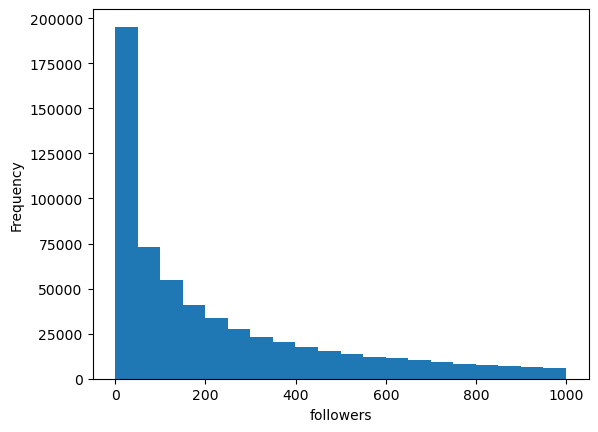

In [55]:
ax = df[df['followers_count'] < 1000]['followers_count'].plot(kind='hist', bins=20)
ax.set_xlabel('followers')
plt.savefig('follower_distr.pdf')

There are two likely scenarios for Twitter users that have < 50 followers:
- either they are very new / inactive users
- or they are bots that have few organic followers

In case of bots, there could be multiple subtypes:
- Spammy bots: bots that post a lot of tweets
- Follower bots: bots that follow a lot of people
- URL bots: bots posting URLs that lead to 3rd party sites

In [71]:
df['tweet_count'].describe()

count    7.787710e+05
mean     2.203307e+04
std      8.818403e+04
min      0.000000e+00
25%      8.770000e+02
50%      4.785000e+03
75%      1.922600e+04
max      5.208539e+07
Name: tweet_count, dtype: float64

In [62]:
df[df['tweet_count'] > 20000].count()

followers_count    189564
following_count    189564
tweet_count        189564
listed_count       189564
dtype: int64

In [82]:
df[df['tweet_count'] < 1000].count()

followers_count    206447
following_count    206447
tweet_count        206447
listed_count       206447
dtype: int64

Text(0.5, 0, 'tweets')

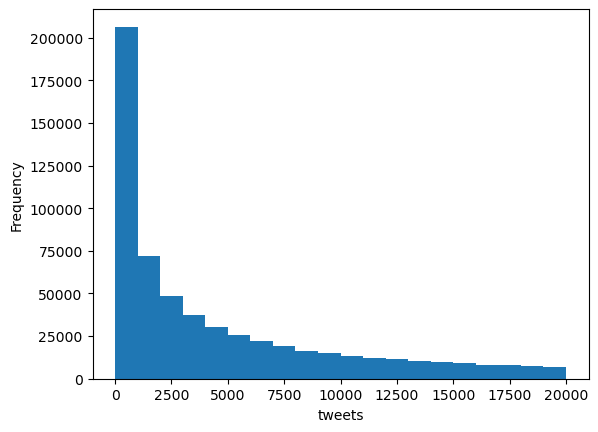

In [63]:
ax = df[df['tweet_count'] < 20000]['tweet_count'].plot(kind='hist', bins=20)
ax.set_xlabel('tweets')

In [75]:
df['following_count'].describe()

count    7.787710e+05
mean     9.655013e+02
std      4.849718e+03
min      0.000000e+00
25%      1.010000e+02
50%      3.300000e+02
75%      8.820000e+02
max      1.521188e+06
Name: following_count, dtype: float64

**Inactive users:**
- low follower count
- low tweet count

In [70]:
low_follower = df['followers_count'] < 50
low_tweet = df['tweet_count'] < 1000

df[low_tweet & low_follower].count()

followers_count    132719
following_count    132719
tweet_count        132719
listed_count       132719
dtype: int64

**Spammy bots:**
- low follower count
- high tweet count

In [73]:
high_tweet = df['tweet_count'] > 20000

df[low_follower & high_tweet].count()

followers_count    6256
following_count    6256
tweet_count        6256
listed_count       6256
dtype: int64

**Follower bots:**

In [78]:
high_following = df['following_count'] > 900

df[low_follower & high_following].count()

followers_count    1431
following_count    1431
tweet_count        1431
listed_count       1431
dtype: int64